In [1]:
# Data Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
raw = pd.read_csv('video-game-sales.csv',
                  delimiter=',')
df = raw.copy()
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.shape

(16598, 11)

Missing

In [7]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
df.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [10]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
df['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [12]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Platform Sales

In [113]:
total_gsales = df['Global_Sales'].sum()
total_gsales

8920.44

In [114]:
df_sub = pd.DataFrame(df.groupby('Platform')['Global_Sales'].sum()\
    .sort_values(ascending=False)).reset_index()
df_sub['Cumulative'] = ((df_sub['Global_Sales']/total_gsales)*100).cumsum().round(0).astype(int)
df_sub

,Platform,Global_Sales,Cumulative
0,PS2,1255.64,14
1,X360,979.96,25
2,PS3,957.84,36
3,Wii,926.71,46
4,DS,822.49,55
5,PS,730.66,64
6,GBA,318.50,67
7,PSP,296.28,70
8,PS4,278.10,74
9,PC,258.82,77


In [115]:
df_sub.describe()

,Global_Sales,Cumulative
count,31.000000,31.000000
mean,287.756129,81.580645
std,351.954013,24.062106
min,0.030000,14.000000
25%,22.165000,72.000000
50%,200.050000,93.000000
75%,287.190000,100.000000
max,1255.640000,100.000000


<Axes: ylabel='Frequency'>

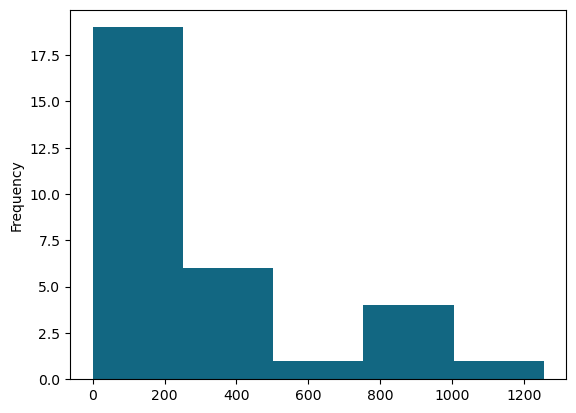

In [116]:
df_sub['Global_Sales'].plot(kind='hist',bins=5,color='#126782')

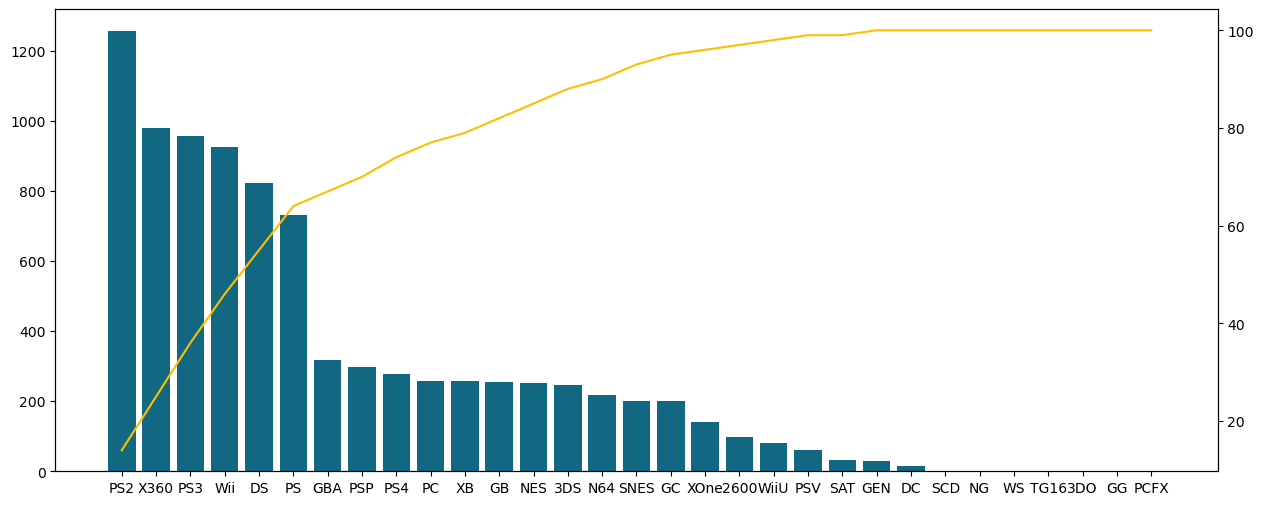

In [133]:
fig,ax1 = plt.subplots(figsize=(15,6))
ax1.bar(df_sub['Platform'],df_sub['Global_Sales'],color='#126782')
ax2 = ax1.twinx()
ax2.plot(df_sub['Cumulative'],color='#FFBF00')

Year Sales

In [105]:
df['Year'] = df['Year'].interpolate(method='linear',axis=0).astype(int)
df['Year'].isna().sum()

0

In [106]:
df_sub = pd.DataFrame(df.groupby('Year')['Global_Sales'].sum()).reset_index()
df_sub

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


In [107]:
df_sub.describe()

,Year,Global_Sales
count,39.000000,39.000000
mean,1999.051282,228.729231
std,11.493588,215.549709
min,1980.000000,0.050000
25%,1989.500000,46.985000
50%,1999.000000,199.690000
75%,2008.500000,368.255000
max,2020.000000,684.720000


<Axes: xlabel='Year'>

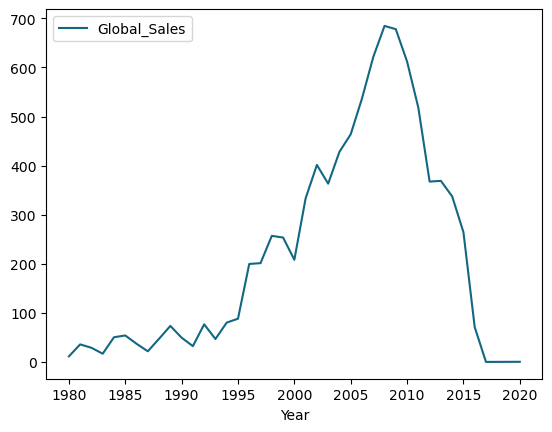

In [108]:
df_sub.plot(kind='line',x='Year',y='Global_Sales',color='#126782')

Genre Sales

In [134]:
df_sub = pd.DataFrame(df.groupby('Genre')['Global_Sales'].sum()\
    .sort_values(ascending=False)).reset_index()
df_sub['Cumulative'] = ((df_sub['Global_Sales']/total_gsales)*100)\
                        .cumsum().round(0).astype(int)
df_sub

,Genre,Global_Sales,Cumulative
0,Action,1751.18,20
1,Sports,1330.93,35
2,Shooter,1037.37,46
3,Role-Playing,927.37,57
4,Platform,831.37,66
5,Misc,809.96,75
6,Racing,732.04,83
7,Fighting,448.91,88
8,Simulation,392.20,93
9,Puzzle,244.95,95


In [135]:
df_sub.describe()

,Global_Sales,Cumulative
count,12.000000,12.000000
mean,743.370000,71.333333
std,479.508528,26.664015
min,175.120000,20.000000
25%,355.387500,54.250000
50%,771.000000,79.000000
75%,954.870000,93.500000
max,1751.180000,100.000000


<Axes: ylabel='Frequency'>

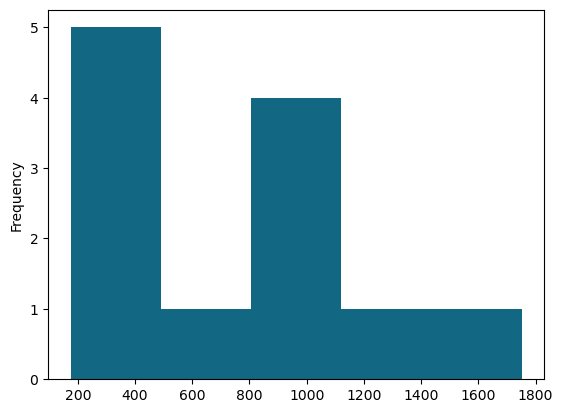

In [136]:
df_sub['Global_Sales'].plot(kind='hist',bins=5,color='#126782')

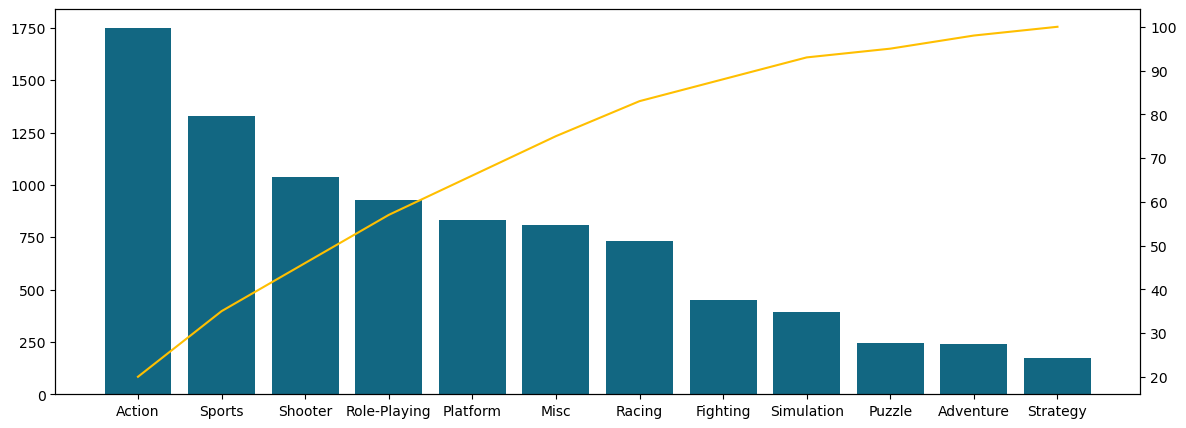

In [145]:
fig,ax1 = plt.subplots(figsize=(14,5))
ax1.bar(df_sub['Genre'],df_sub['Global_Sales'],color='#126782')
ax2 = ax1.twinx()
ax2.plot(df_sub['Cumulative'], color='#FFBF00')